In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn import linear_model

from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import svm, preprocessing 

import cufflinks as cf
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from operator import add
init_notebook_mode(connected=True)
import random
import time
import os

In [2]:
data = pd.read_csv(r"D:\8th Semester B.Tech (IT)\4. Major Project\Diamond.csv")

In [3]:
data

,carat,cut,color,clarity,height (in mm),table,price (in USD),length (in mm),width (in mm),depth (in mm)
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,5,7,3,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,2,7,3,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,3,7,3,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,4,3,2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
data.head()

,carat,cut,color,clarity,height (in mm),table,price (in USD),length (in mm),width (in mm),depth (in mm)
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carat           53940 non-null  float64
 1   cut             53940 non-null  int64  
 2   color           53940 non-null  int64  
 3   clarity         53940 non-null  int64  
 4   height (in mm)  53940 non-null  float64
 5   table           53940 non-null  float64
 6   price (in USD)  53940 non-null  int64  
 7   length (in mm)  53940 non-null  float64
 8   width (in mm)   53940 non-null  float64
 9   depth (in mm)   53940 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 4.1 MB


In [6]:
data.isnull().sum()

carat             0
cut               0
color             0
clarity           0
height (in mm)    0
table             0
price (in USD)    0
length (in mm)    0
width (in mm)     0
depth (in mm)     0
dtype: int64

In [7]:
data.dtypes

carat             float64
cut                 int64
color               int64
clarity             int64
height (in mm)    float64
table             float64
price (in USD)      int64
length (in mm)    float64
width (in mm)     float64
depth (in mm)     float64
dtype: object

In [8]:
data.describe()

,carat,cut,color,clarity,height (in mm),table,price (in USD),length (in mm),width (in mm),depth (in mm)
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,3.904097,4.405803,4.051020,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.116600,1.701105,1.647136,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,1.000000,1.000000,1.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,3.000000,3.000000,3.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,4.000000,4.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,5.000000,6.000000,5.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,5.000000,7.000000,8.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [9]:
numcols = data.select_dtypes(include = ['float64','int64']).columns.tolist()

C:\Users\KALPANIGAM\AppData\Local\Temp\ipykernel_21028\4154727937.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\KALPANIGAM\AppData\Local\Temp\ipykernel_21028\4154727937.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\KALPANIGAM\AppData\Local\Temp\ipykernel_21028\4154727937.py:5: UserWarning:



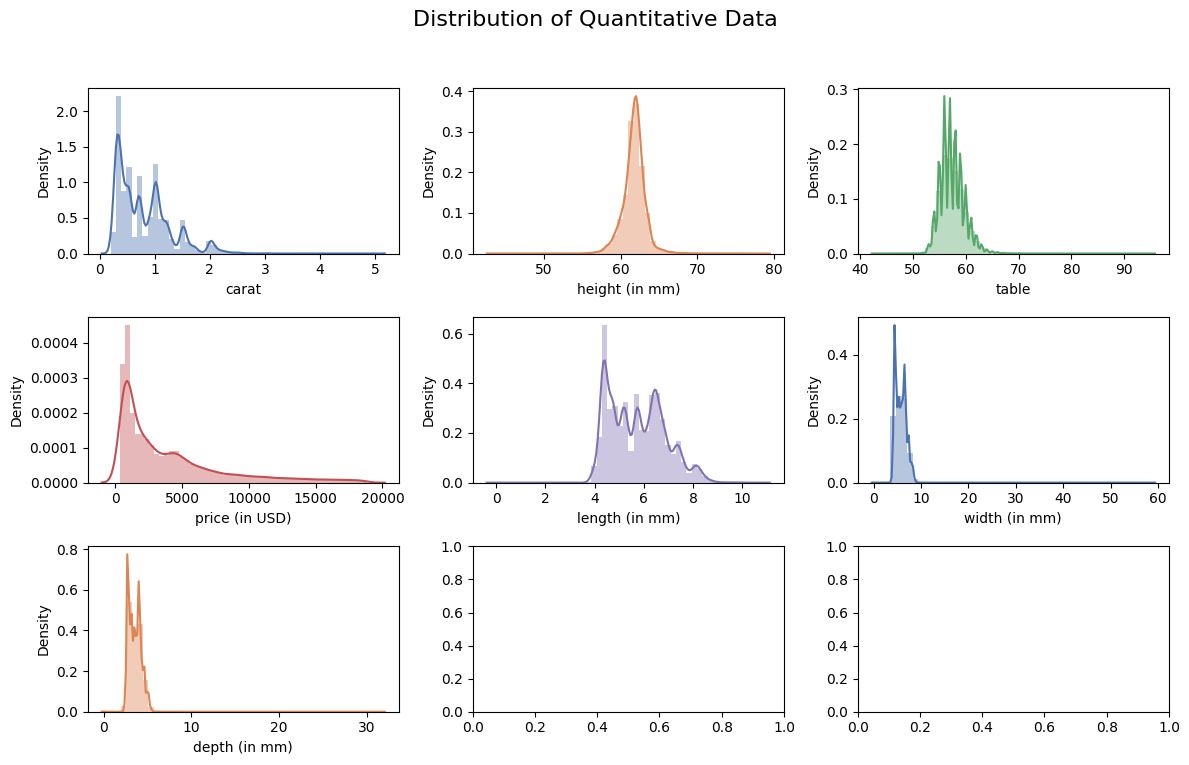

In [10]:
colors = sns.color_palette("deep")
fig,axes = plt.subplots(3,3, figsize = (12,8)) 
sns.distplot(data["carat"], color = colors[0], ax = axes[0,0])
sns.distplot(data["height (in mm)"], color = colors[1], ax = axes[0,1])
sns.distplot(data["table"], color = colors[2], ax = axes[0,2])
sns.distplot(data["price (in USD)"], color = colors[3], ax = axes[1,0])
sns.distplot(data["length (in mm)"], color = colors[4], ax = axes[1,1])
sns.distplot(data["width (in mm)"], color = colors[0], ax = axes[1,2])
sns.distplot(data["depth (in mm)"], color = colors[1], ax = axes[2,0])
plt.suptitle("Distribution of Quantitative Data", size = 16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

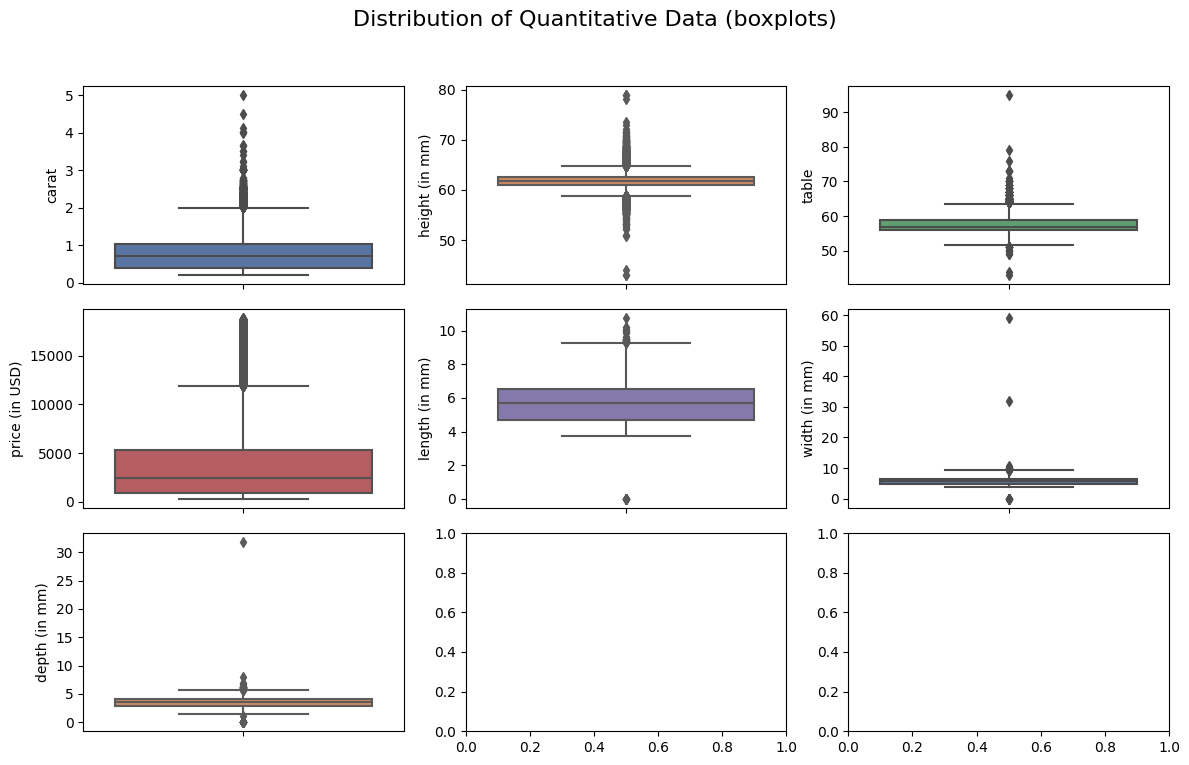

In [11]:
colors = sns.color_palette("deep")
fig,axes = plt.subplots(3,3, figsize = (12,8)) 
sns.boxplot(y = data["carat"], color = colors[0], ax = axes[0,0])
sns.boxplot(y = data["height (in mm)"], color = colors[1], ax = axes[0,1])
sns.boxplot(y = data["table"], color = colors[2], ax = axes[0,2])
sns.boxplot(y = data["price (in USD)"], color = colors[3], ax = axes[1,0])
sns.boxplot(y = data["length (in mm)"], color = colors[4], ax = axes[1,1])
sns.boxplot(y = data["width (in mm)"], color = colors[0], ax = axes[1,2])
sns.boxplot(y = data["depth (in mm)"], color = colors[1], ax = axes[2,0])
plt.suptitle("Distribution of Quantitative Data (boxplots)", size = 16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [12]:
zero_data = data[(data['length (in mm)'] == 0) | (data['width (in mm)'] == 0) | (data['depth (in mm)'] == 0)]

In [13]:
zero_data.head()

,carat,cut,color,clarity,height (in mm),table,price (in USD),length (in mm),width (in mm),depth (in mm)
2207,1.00,4,4,2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,4,3,1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,4,4,2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,4,5,2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,2,4,1,64.0,61.0,4731,7.15,7.04,0.0


In [14]:
zero_data.shape

(20, 10)

In [15]:
data.drop(zero_data.index, inplace = True)

In [16]:
data.shape

(53920, 10)

In [17]:
X = data.drop(['price (in USD)'], axis=1)
y = data['price (in USD)']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
print("Total dataset size: {}".format(data.shape))
print("Training set size (80%): {}".format(X_train.shape))
print("Test set size (20%): {}".format(X_test.shape))

Total dataset size: (53920, 10)
Training set size (80%): (43136, 9)
Test set size (20%): (10784, 9)


# StandardScaler Method

In [20]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

#  Training Dataset 

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Linear Regression Algorithm

In [22]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(X_train,y_train)
pred=linreg.predict(X_test)

# Accuracy Score of Linear Regression Model

In [23]:
from sklearn.metrics import r2_score
lr = r2_score(y_test,pred)
print(lr)

0.9075437489865839


# Decision Tree Regressor Algorithm

In [24]:
from sklearn.tree import DecisionTreeRegressor
reg=DecisionTreeRegressor()
reg.fit(X_train,y_train)
pred1=reg.predict(X_test)

# Accuracy Score of Decision Tree Regressor Model

In [49]:
from sklearn.metrics import r2_score
dtr=r2_score(y_test,pred1)
print(dtr)

0.9647081975502118


# Random Forest Regressor Algorithm

In [26]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=50)
rf.fit(X_train,y_train)
pred2=rf.predict(X_test)

# Accuracy Score of Random Forest Regressor Model

In [45]:
from sklearn.metrics import r2_score
rfr=r2_score(y_test,pred2)
print(rfr)

0.9810825235161053


# K-Neighbors Regressor Algorithm

In [28]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train,y_train)
pred3=knn.predict(X_test)

# Accuracy Score of K-Neighbors Regressor Model

In [47]:
from sklearn.metrics import r2_score
knr=r2_score(y_test,pred3)
print(knr)

0.968075587430797


# Lasso Regression Algorithm

In [30]:
from sklearn.linear_model import Lasso
lassoreg=Lasso()
lassoreg.fit(X_train,y_train)
pred4=lassoreg.predict(X_test)

# Accuracy Score of Lasso Algorithm

In [31]:
lasso=r2_score(y_test,pred4)
print(lasso)

0.907572102619866


# Ridge Regression Algorithm

In [32]:
from sklearn.linear_model import Ridge
ridreg=Ridge()
ridreg.fit(X_train,y_train)
pred4=ridreg.predict(X_test)

# Accuracy Score of Ridge Algorithm

In [33]:
from sklearn.metrics import r2_score
rid=r2_score(y_test,pred4)
print(rid)

0.9075547354892607


# Support Vector Regression Algorithm

In [ ]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(X_train,y_train)
pred5=svr.predict(X_test)

# Accuracy Score of SVR Algorithm

In [44]:
rfr=0.9810825235161052

In [46]:
knr=0.968075587430797

In [48]:
dtr=0.9647081975502118